In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [57]:
cols = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv('./breastcancer_data/wdbc.data', names=cols)
df['Diagnosis'] = (df['Diagnosis'] == 'M').astype(int) # M = 1; B = 0
df = df.drop(columns=['ID'])

In [59]:
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
df.shape

(569, 31)

# Split/Standardize Data

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
train, test = np.split(df.sample(frac=1), [int(len(df)*0.8)])

/home/shawn/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [68]:
print(train.shape, test.shape)

(455, 31) (114, 31)


In [78]:
def split_dataset(df):
    X = df[df.columns[1:]]
    y = df[df.columns[0]]
    df = np.hstack((X, np.reshape(y, (-1,1))))
    return df, X, y

In [80]:
dataset, X, y = split_dataset(df)
train, X_train, y_train = split_dataset(train)
test, X_test, y_test = split_dataset(test)

In [82]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [84]:
def scale_dataset(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [86]:
X_train, X_test = scale_dataset(X_train, X_test)

In [88]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


# KNN model

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [93]:
def train_knn_model(n_neighbors):
    knn_model = KNeighborsClassifier(n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [95]:
train_knn_model(5)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        69
           1       0.98      0.89      0.93        45

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [100]:
def train_nb_model():
    nbb_model = GaussianNB()
    nbb_model.fit(X_train, y_train)
    y_pred = nbb_model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [102]:
train_nb_model()

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.89      0.93      0.91        45

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# Log Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [107]:
def train_log_model():
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

In [109]:
train_log_model()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.98      0.99        45

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# SVM

In [112]:
from sklearn.svm import SVC

In [114]:
def train_svm_model():
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(classification_report(y_test, y_pred))

In [116]:
train_svm_model()

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.98      0.93      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Neural Net

In [119]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [121]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [123]:
def train_nn_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = Sequential([
        Dense(num_nodes, activation='relu'),
        Dropout(dropout_prob),
        Dense(num_nodes, activation='relu'),
        Dropout(dropout_prob),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(
        optimizer=keras.optimizers.Adam(lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history

In [125]:
model, history = train_nn_model(X_train, y_train, 16, 0.2, 0.001, 32, 100)

I0000 00:00:1724483607.688930    3648 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724483607.787854    3648 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724483607.789279    3648 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724483607.792718    3648 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

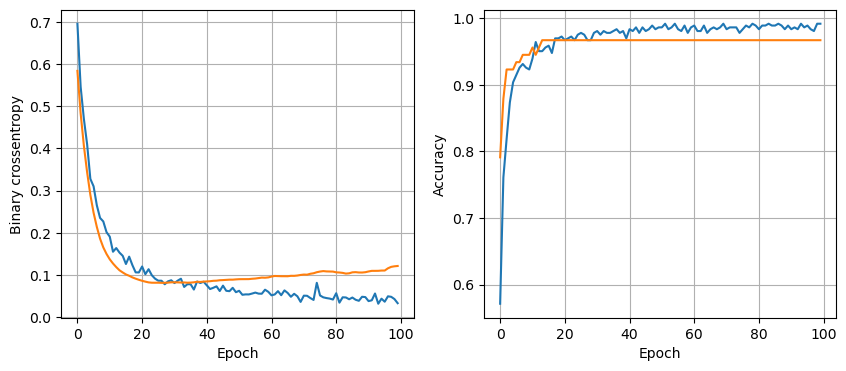

In [127]:
plot_history(history)

In [129]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
              precision    recall  f1-score   support

           0       0.61      1.00      0.75        69
           1       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114



/home/shawn/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shawn/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shawn/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
def train_dt_model():
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(classification_report(y_test, y_pred))

In [136]:
train_dt_model()

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        69
           1       0.88      0.98      0.93        45

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
def train_rf_model():
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [143]:
train_rf_model()

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.95      0.91      0.93        45

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

